## Shelling 모델 실습

In [1]:
import matplotlib.pyplot as plt
import itertools
import random
import copy

In [2]:
width = 100
height = 100
empty_ratio = 0.7
similarity_threshold = 0.8
n_iterations = 100

In [3]:
def make_agents(races):
    empty_houses = []
    agents = {}
    races = races
    
    all_houses = list(itertools.product(range(width), range(height)))
    random.shuffle(all_houses)
    n_empty = int(empty_ratio * len(all_houses))
    empty_houses = all_houses[:n_empty]
    remaining_houses = all_houses[n_empty:]
    
    if races == 2:
        houses_by_race = [remaining_houses[i::races] for i in range(races)]
        
    elif races == 3:
        houses_by_race = []
        for i in range(races):
            if i == 0:
                houses_by_race.append(remaining_houses[i::races]+remaining_houses[9*i+5::races*3])
            if i == 1:
                houses_by_race.append(remaining_houses[i::races]+remaining_houses[9*i-1::races*3])
            if i == 2:
                houses_by_race.append(remaining_houses[i::races*3])
                
    for race, houses in enumerate(houses_by_race):
        for house in houses:
            agents[house] = race
        
    return empty_houses, agents

In [4]:
def is_unsatisfied(x,y):
    race = agents[(x,y)]
    count_similar = 0
    count_different = 0
    
    if x > 0 and y > 0 and (x-1, y-1) not in empty_houses: #10시
        if agents[(x-1, y-1)] == race:
            count_similar += 1
        else:
            count_different += 1
            
    if y > 0 and (x, y-1) not in empty_houses:#12시
        if agents[(x, y-1)] == race:
            count_similar += 1
        else:
            count_different += 1
            
    if x < (width-1) and y > 0 and (x+1, y-1) not in empty_houses:#2시
        if agents[(x+1, y-1)] == race:
            count_similar += 1
        else:
            count_different += 1
            
    if x > 0 and (x-1, y) not in empty_houses:#9시
        if agents[(x-1, y)] == race:
            count_similar += 1
        else:
            count_different += 1
            
    if x < (width-1) and (x+1, y) not in empty_houses:#3시
        if agents[(x+1, y)] == race:
            count_similar += 1
        else:
            count_different += 1

    if x > 0 and y < (height-1) and (x-1, y+1) not in empty_houses:#8시
        if agents[(x-1, y+1)] == race:
            count_similar += 1
        else:
            count_different += 1
            
    if x > 0 and y < (height-1) and (x, y+1) not in empty_houses:#6시
        if agents[(x, y+1)] == race:
            count_similar += 1
        else:
            count_different += 1
            
    if x < (width-1) and y < (height-1) and (x+1, y+1) not in empty_houses:#5시
        if agents[(x+1, y+1)] == race:
            count_similar += 1
        else:
            count_different += 1
            
    if (count_similar + count_different) == 0:
        return False
    else:
        return float(count_similar)/(count_similar + count_different) < similarity_threshold

In [5]:
def move_to_empty(agent):
    agent_race = agents[agent]
    empty_house = random.choice(empty_houses)
    agents[empty_house] = agent_race

    del agents[agent]
    empty_houses.remove(empty_house)
    empty_houses.append(agent)

In [6]:
plt.rcParams.update({'figure.figsize': (15, 10)})

def plot(iteration):
    fig, ax = plt.subplots()
    agent_colors = {0: 'b', 1:'r', 2:'g', 3: 'c', 4: 'm', 5: 'y', 6: 'k'}

    for agent in agents:
        ax.scatter(agent[0]+0.5, agent[1]+0.5, color=agent_colors[agents[agent]])
    ax.set_title("Iteration %d:" % iteration, fontsize=10, fontweight ='bold')
    ax.set_xlim([0, width])
    ax.set_ylim ([0, height])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig("iter%d" % iteration)

In [7]:
empty_houses, agents = make_agents(races=2)
print(agents)

{(1, 26): 0, (30, 43): 0, (4, 30): 0, (12, 56): 0, (9, 49): 0, (67, 49): 0, (15, 15): 0, (30, 78): 0, (69, 34): 0, (82, 64): 0, (64, 69): 0, (74, 72): 0, (31, 66): 0, (6, 16): 0, (36, 57): 0, (83, 51): 0, (26, 78): 0, (31, 1): 0, (93, 13): 0, (46, 54): 0, (16, 66): 0, (4, 64): 0, (45, 63): 0, (70, 1): 0, (72, 21): 0, (87, 68): 0, (47, 51): 0, (1, 19): 0, (92, 96): 0, (76, 20): 0, (26, 53): 0, (18, 80): 0, (83, 44): 0, (8, 75): 0, (88, 36): 0, (12, 51): 0, (56, 15): 0, (7, 92): 0, (27, 83): 0, (85, 10): 0, (9, 73): 0, (13, 83): 0, (56, 82): 0, (37, 88): 0, (42, 40): 0, (97, 28): 0, (10, 79): 0, (40, 61): 0, (99, 31): 0, (41, 1): 0, (23, 25): 0, (17, 45): 0, (55, 23): 0, (70, 32): 0, (74, 5): 0, (39, 83): 0, (17, 8): 0, (73, 60): 0, (69, 84): 0, (81, 63): 0, (33, 44): 0, (19, 23): 0, (47, 99): 0, (52, 89): 0, (65, 76): 0, (88, 57): 0, (90, 65): 0, (65, 73): 0, (57, 93): 0, (79, 26): 0, (92, 5): 0, (38, 89): 0, (89, 90): 0, (11, 72): 0, (77, 94): 0, (81, 48): 0, (77, 17): 0, (95, 42): 0, 

Iteration: 1 Number of changes: 1921
Iteration: 2 Number of changes: 1447
Iteration: 3 Number of changes: 1207
Iteration: 4 Number of changes: 1178
Iteration: 5 Number of changes: 1067
Iteration: 6 Number of changes: 957
Iteration: 7 Number of changes: 886
Iteration: 8 Number of changes: 901
Iteration: 9 Number of changes: 834
Iteration: 10 Number of changes: 797
Iteration: 11 Number of changes: 819
Iteration: 12 Number of changes: 791
Iteration: 13 Number of changes: 809
Iteration: 14 Number of changes: 831
Iteration: 15 Number of changes: 865
Iteration: 16 Number of changes: 786
Iteration: 17 Number of changes: 760
Iteration: 18 Number of changes: 839
Iteration: 19 Number of changes: 777
Iteration: 20 Number of changes: 787
Iteration: 21 Number of changes: 651
Iteration: 22 Number of changes: 654
Iteration: 23 Number of changes: 607
Iteration: 24 Number of changes: 682
Iteration: 25 Number of changes: 656
Iteration: 26 Number of changes: 659
Iteration: 27 Number of changes: 586
Itera

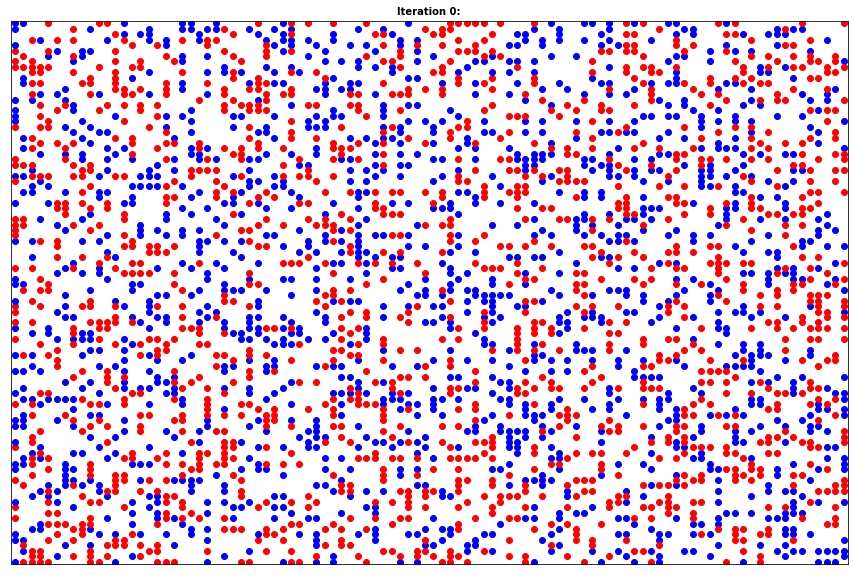

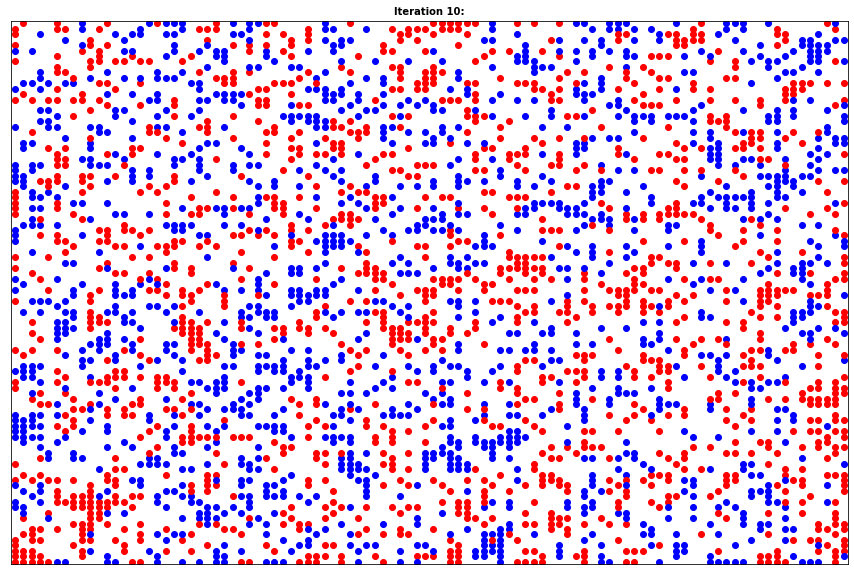

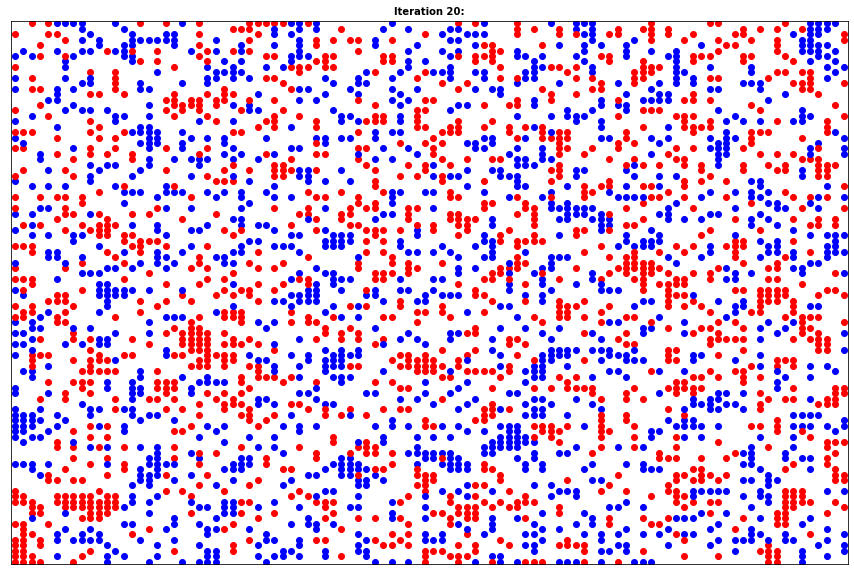

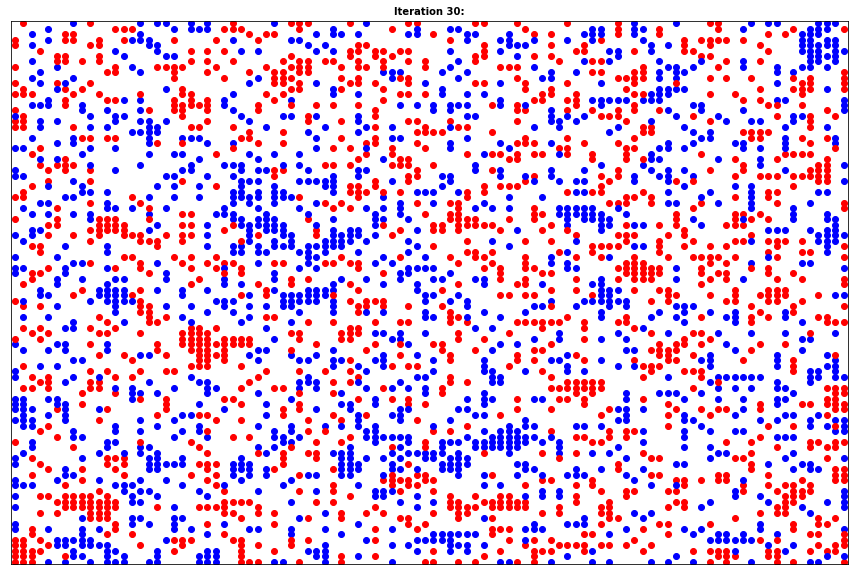

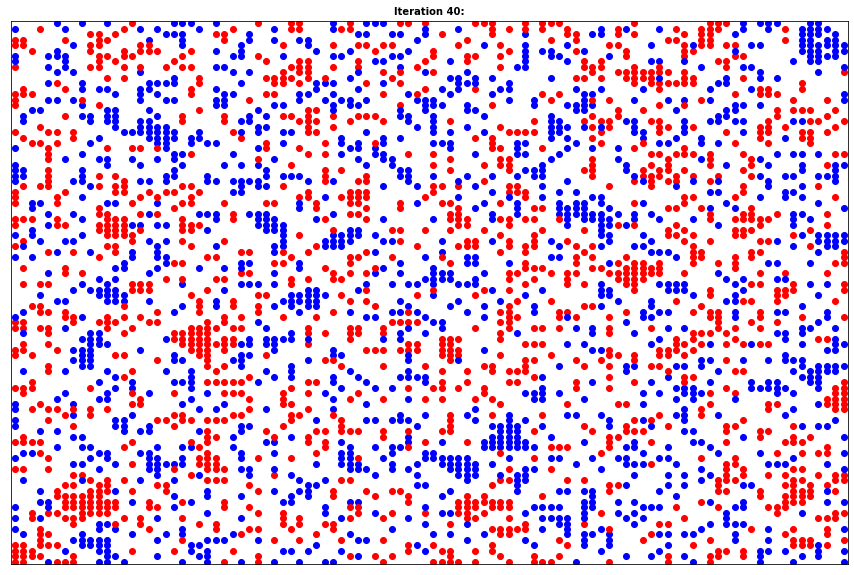

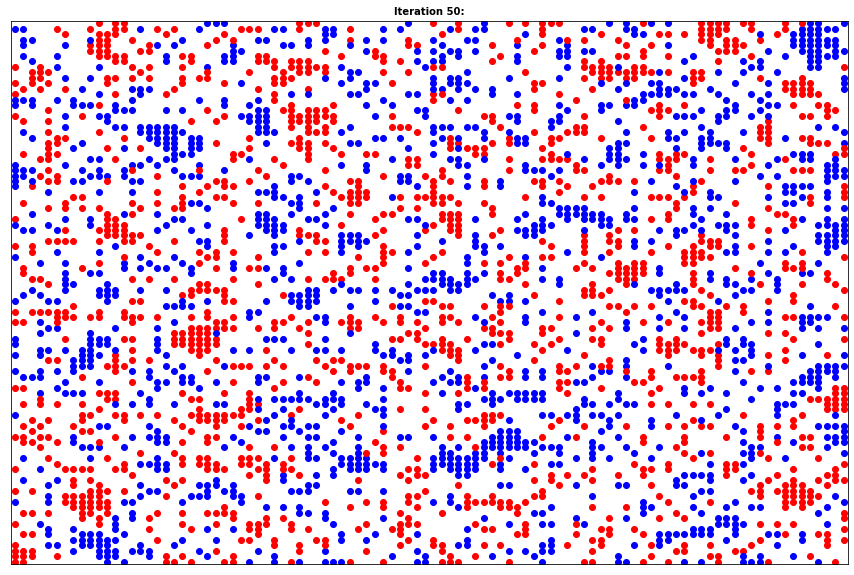

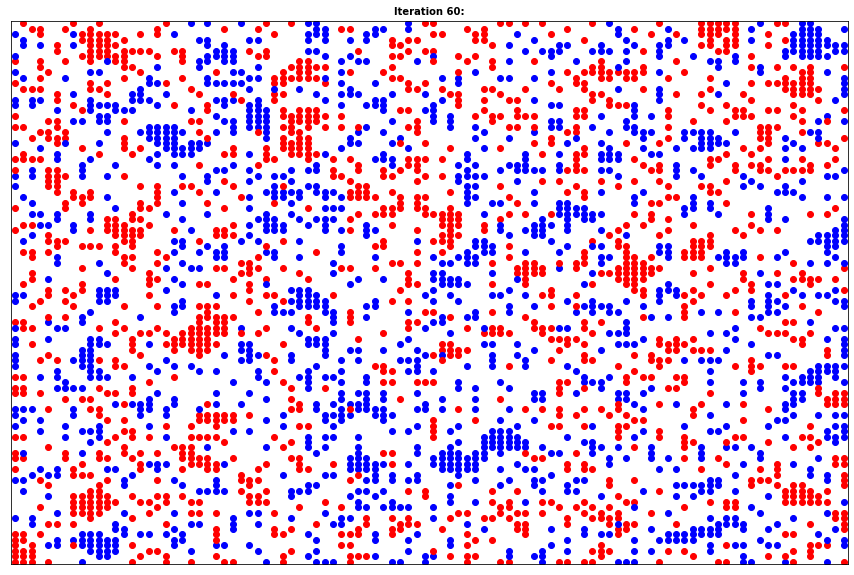

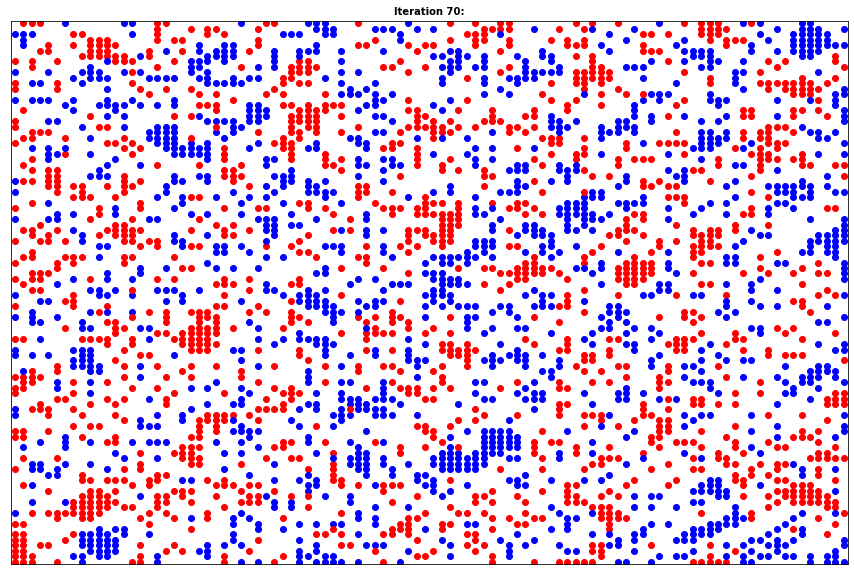

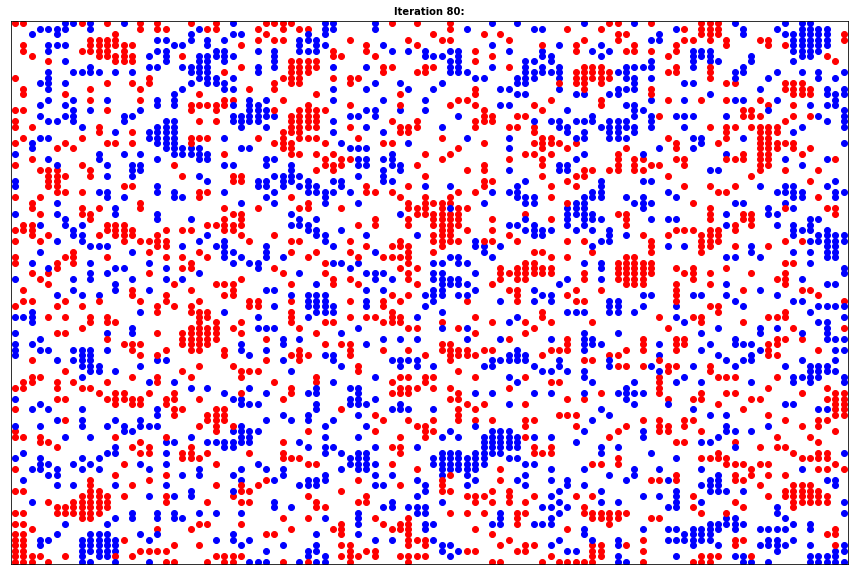

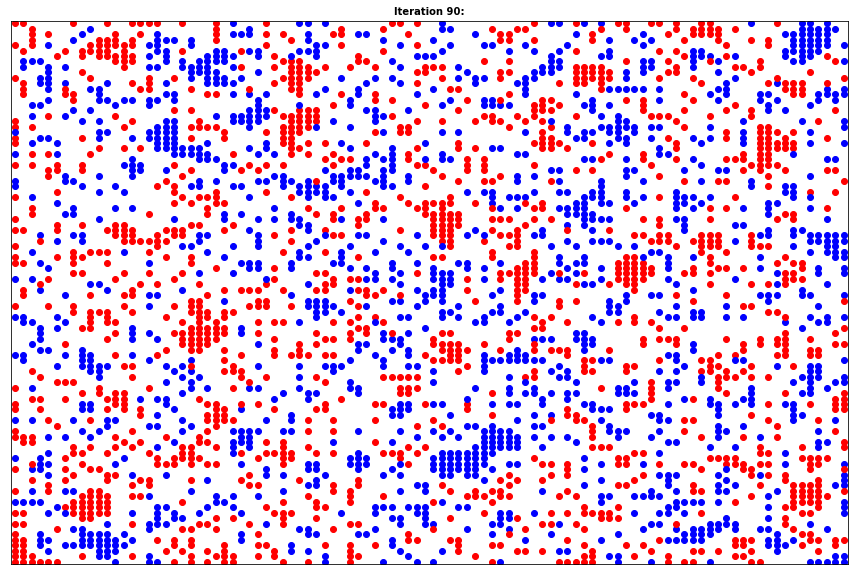

In [8]:
for i in range(n_iterations):
    old_agents = copy.deepcopy(agents)
    n_changes = 0 

    for agent in old_agents:
        if is_unsatisfied(agent[0], agent[1]):
            move_to_empty(agent)
            n_changes += 1

    print('Iteration: %d Number of changes: %d' %(i+1, n_changes))

    if i % 10 == 0:
        plot(i)
    if n_changes == 0:
        break

### 결론: 
#### 시간이 지남에 따라 주변에 있는 비슷한 노드끼리 가까워져 spatial segregation이 발생하였고 일종의 클러스터링이 형성되는 것을 관찰할 수 있다. 이것의 원리는, 현재 위치에서 각 노드가, 그것의 이웃 노드 중 같은 종류인 것이 threshold 개 미만일 경우, 현재 위치보다 더 만족스러운 곳을 찾기 위해 자리를 옮기는 것이다. 일련의 과정이 반복되면서 동일한 종류의 노드끼리 모인 영역(clustering)이 점차 넓어지게 되는 것이다.


## 소수 인종이 있으면 어떻게 되는가?
- Threshold가 높아지는가?
- 다수의 인종에도 적용이 되는가?  
소수 인종을 포함하기 위해 race를 2에서 3으로 늘리고, 이 중 두 가지(빨강, 파랑)의 race를 major, 남
은 한 가지(초록)를 상대적으로 minor가 되도록 개수를 지정하였다. 즉 초록 노드의 개수는 빨강과 파랑
노드의 개수보다 상대적으로 적다.

In [9]:
empty_houses, agents = make_agents(races=3)
print(agents)

{(12, 20): 0, (28, 98): 0, (27, 5): 0, (19, 22): 0, (78, 44): 0, (86, 22): 0, (13, 63): 0, (56, 88): 0, (66, 17): 0, (11, 25): 0, (54, 83): 0, (56, 91): 0, (8, 77): 0, (47, 75): 0, (5, 57): 0, (46, 78): 0, (43, 90): 0, (56, 22): 0, (36, 46): 0, (85, 40): 0, (82, 97): 0, (96, 99): 0, (54, 92): 0, (15, 55): 0, (40, 69): 0, (48, 37): 0, (14, 14): 0, (68, 46): 0, (38, 21): 0, (89, 60): 0, (55, 8): 0, (24, 7): 0, (24, 88): 0, (79, 38): 0, (59, 81): 0, (16, 97): 0, (2, 50): 0, (96, 4): 0, (92, 87): 0, (20, 88): 0, (71, 91): 0, (30, 50): 0, (28, 80): 0, (74, 12): 0, (71, 53): 0, (73, 0): 0, (95, 24): 0, (55, 50): 0, (62, 68): 0, (98, 74): 0, (86, 86): 0, (55, 0): 0, (54, 77): 0, (49, 43): 0, (75, 64): 0, (63, 83): 0, (14, 56): 0, (16, 9): 0, (27, 33): 0, (22, 24): 0, (24, 52): 0, (12, 97): 0, (42, 4): 0, (40, 41): 0, (14, 61): 0, (65, 13): 0, (37, 90): 0, (35, 72): 0, (53, 60): 0, (82, 0): 0, (22, 77): 0, (11, 10): 0, (89, 58): 0, (62, 55): 0, (44, 35): 0, (33, 72): 0, (88, 38): 0, (59, 25): 

Iteration: 1 Number of changes: 2176
Iteration: 2 Number of changes: 1811
Iteration: 3 Number of changes: 1798
Iteration: 4 Number of changes: 1750
Iteration: 5 Number of changes: 1660
Iteration: 6 Number of changes: 1673
Iteration: 7 Number of changes: 1626
Iteration: 8 Number of changes: 1616
Iteration: 9 Number of changes: 1662
Iteration: 10 Number of changes: 1584
Iteration: 11 Number of changes: 1598
Iteration: 12 Number of changes: 1629
Iteration: 13 Number of changes: 1647
Iteration: 14 Number of changes: 1616
Iteration: 15 Number of changes: 1572
Iteration: 16 Number of changes: 1616
Iteration: 17 Number of changes: 1592
Iteration: 18 Number of changes: 1535
Iteration: 19 Number of changes: 1494
Iteration: 20 Number of changes: 1568
Iteration: 21 Number of changes: 1588
Iteration: 22 Number of changes: 1596
Iteration: 23 Number of changes: 1569
Iteration: 24 Number of changes: 1597
Iteration: 25 Number of changes: 1627
Iteration: 26 Number of changes: 1571
Iteration: 27 Number 

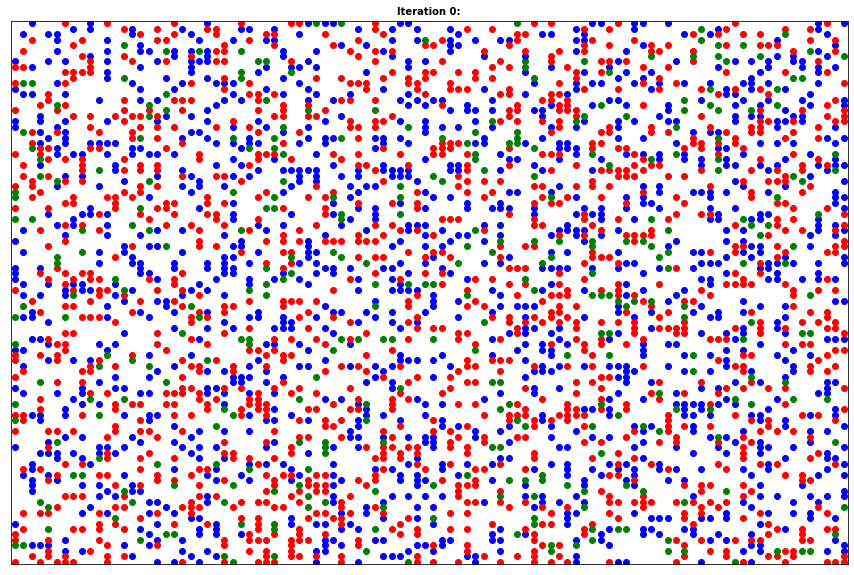

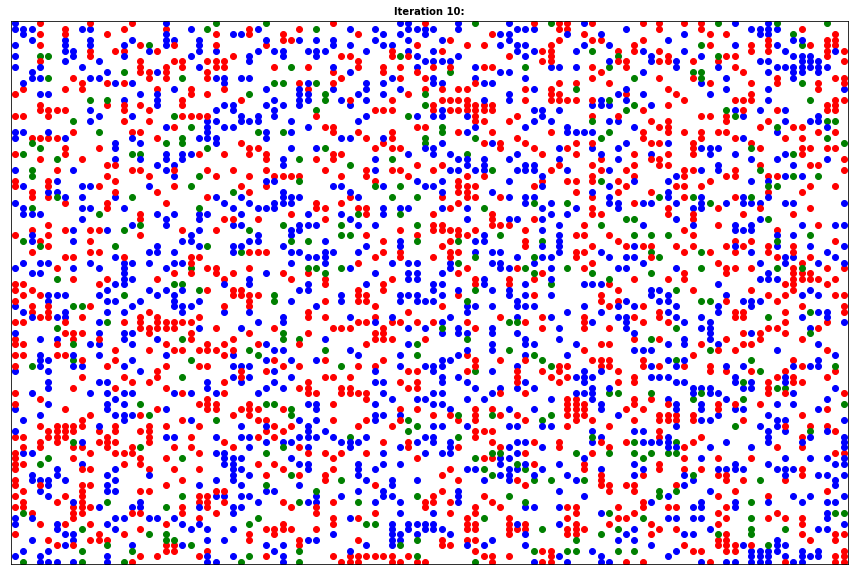

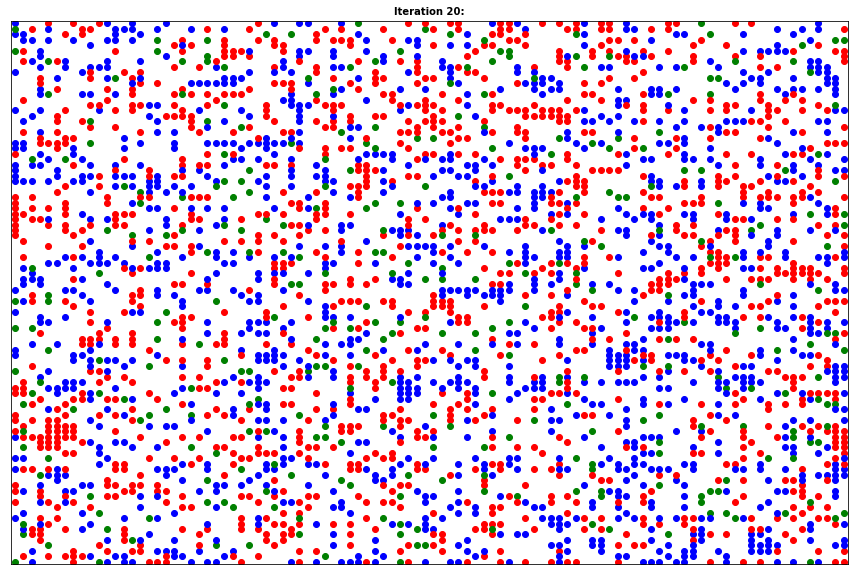

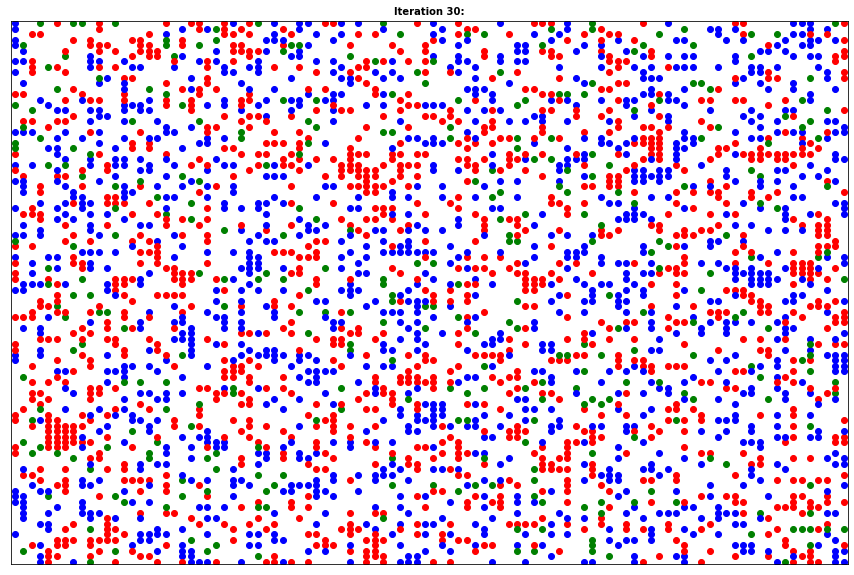

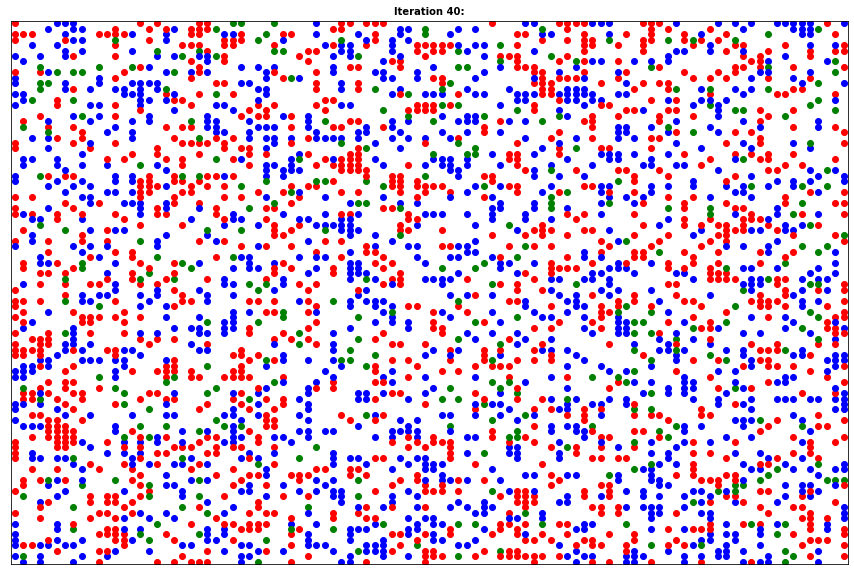

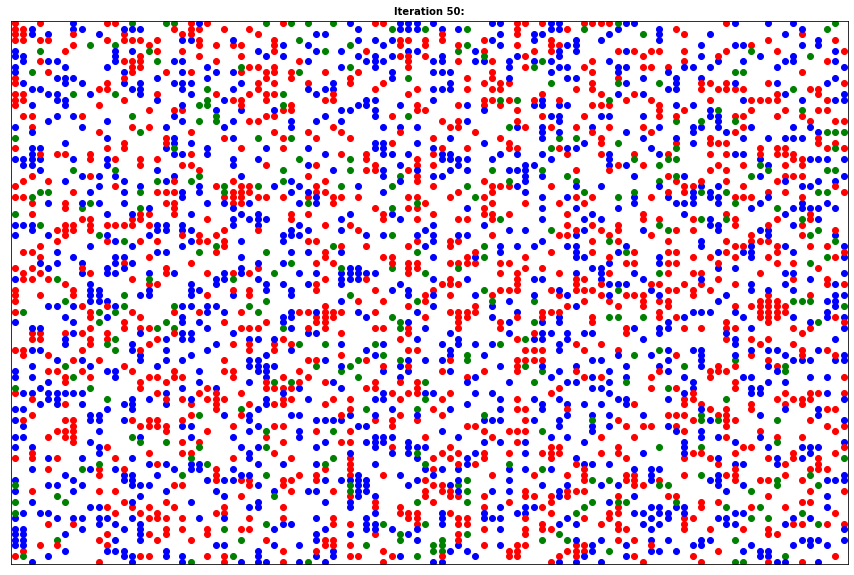

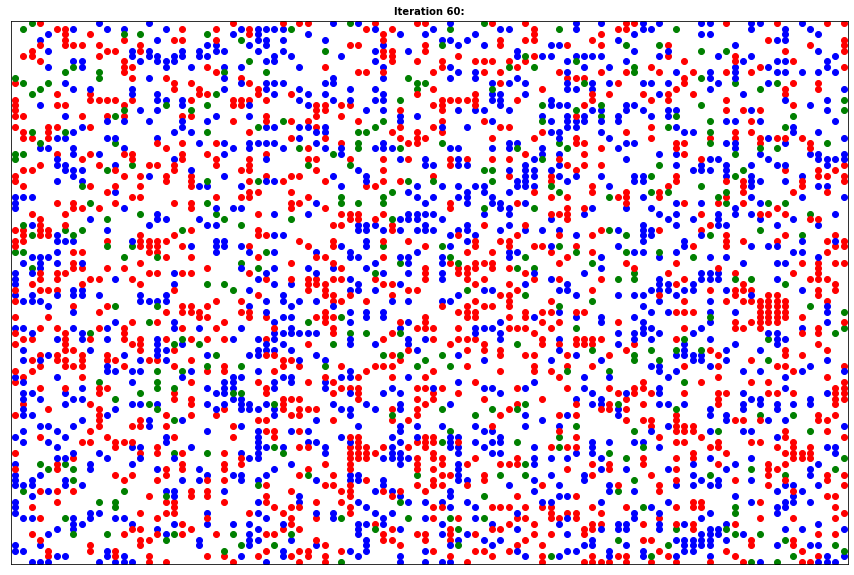

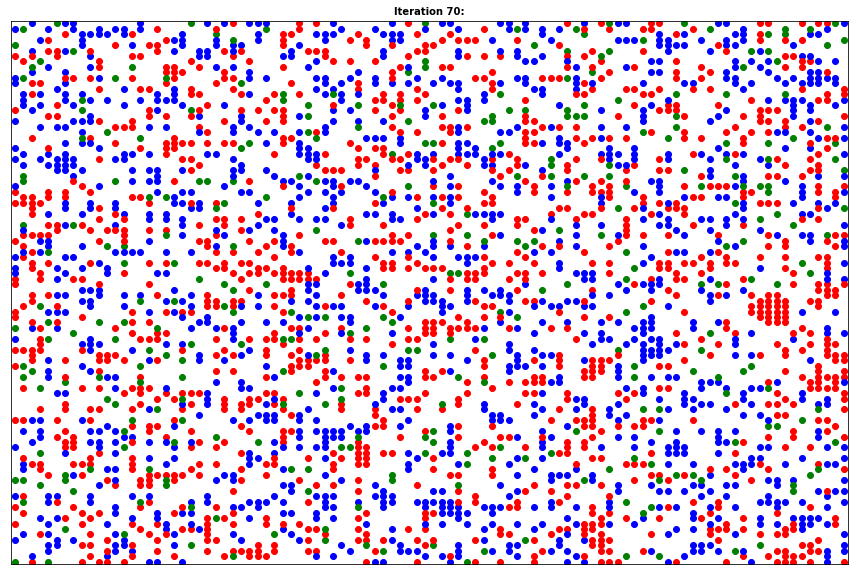

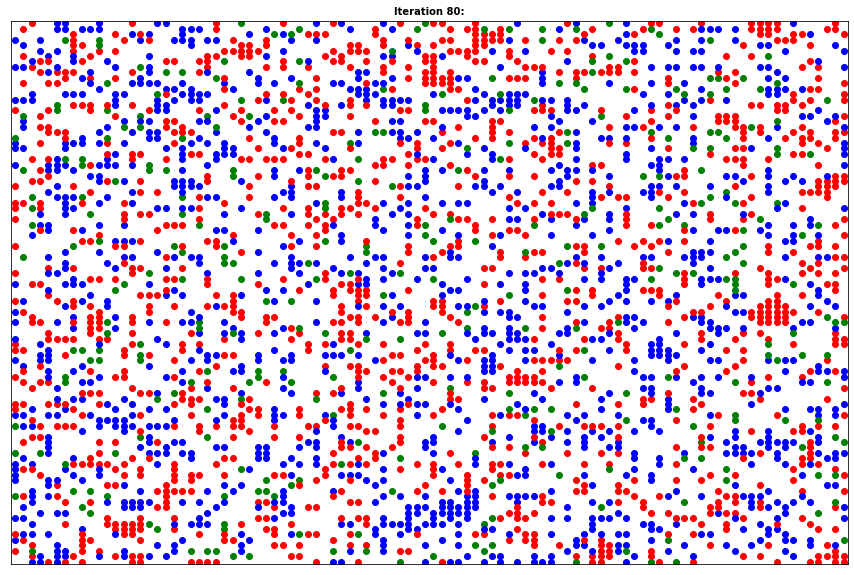

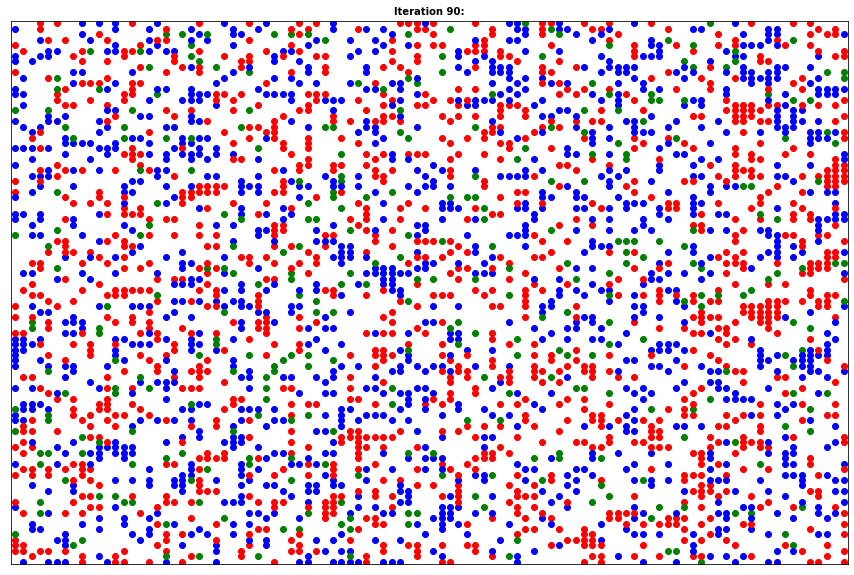

In [10]:
for i in range(n_iterations):
    old_agents = copy.deepcopy(agents)
    n_changes = 0 

    for agent in old_agents:
        if is_unsatisfied(agent[0], agent[1]):
            move_to_empty(agent)
            n_changes += 1

    print('Iteration: %d Number of changes: %d' %(i+1, n_changes))

    if i % 10 == 0:
        plot(i)
    if n_changes == 0:
        break

### 결론: 
#### 시간이 지남에 따라 동일한 색깔의 노드끼리 모이는 clustering이 형성되었고 spatial segregation이 어느 정도 발생하였다. 그러나 이러한 현상은 race가 두 종류였을 때에 비해 덜 뚜렷하게 관찰되었다.
#### 또한, 상대적으로 개수가 적은 초록색 노드(minority, 즉 소수의 인종에 해당하는 노드)의 경우, clustering 정도가 빨강과 파랑 노드의 clustering 정도에 비해 더 약하게 발생하였다.
### 개선:
#### 현재 노드 개수로는 전반적으로 spatial segregation이 뚜렷하게 나타나지 않은 것 같아, 전체 노드개수를 늘렸다. ‘빨강 : 파랑 : 초록’의 개수 비율을 설정할 때, 기존 세팅보다 초록의 비율이 더욱 작도록 재조정함으로써, 초록 노드가 더욱 극단적인 minority가 되도록 하였다.


## 개선된 세팅에서 다시 실행

In [16]:
width = 150
height = 150
empty_ratio = 0.7
similarity_threshold = 0.8
n_iterations = 100

def make_agents(races):
    empty_houses = []
    agents = {}
    races = races
    
    all_houses = list(itertools.product(range(width), range(height)))
    random.shuffle(all_houses)
    n_empty = int(empty_ratio * len(all_houses))
    empty_houses = all_houses[:n_empty]
    remaining_houses = all_houses[n_empty:]
    
    if races == 2:
        houses_by_race = [remaining_houses[i::races] for i in range(races)]
        
    elif races == 3:
        houses_by_race = []
        for i in range(races):
            if i == 0:
                i_0 = [x for x in remaining_houses[i::races]+remaining_houses[6*i+5::races*2] if x not in remaining_houses[2::races*9]]
                houses_by_race.append(i_0)
            if i == 1:
                i_0 = [x for x in remaining_houses[i::races]+remaining_houses[6*i+2::races*2] if x not in remaining_houses[2::races*9]]
                houses_by_race.append(i_0)
            if i == 2:
                houses_by_race.append(remaining_houses[i::races*9])
                
    for race, houses in enumerate(houses_by_race):
        for house in houses:
            agents[house] = race
        
    return empty_houses, agents

In [17]:
empty_houses, agents = make_agents(races=3)
print(agents)

{(112, 59): 0, (94, 124): 0, (64, 2): 0, (109, 54): 0, (134, 134): 0, (112, 132): 0, (5, 91): 0, (145, 22): 0, (117, 1): 0, (147, 40): 0, (147, 78): 0, (49, 15): 0, (41, 42): 0, (59, 92): 0, (137, 55): 0, (141, 35): 0, (8, 6): 0, (103, 94): 0, (33, 117): 0, (11, 46): 0, (76, 91): 0, (38, 86): 0, (21, 67): 0, (90, 135): 0, (81, 137): 0, (77, 142): 0, (131, 27): 0, (120, 64): 0, (134, 42): 0, (98, 95): 0, (132, 55): 0, (82, 79): 0, (130, 51): 0, (92, 44): 0, (35, 118): 0, (62, 6): 0, (60, 100): 0, (125, 54): 0, (84, 1): 0, (78, 134): 0, (73, 137): 0, (131, 39): 0, (91, 32): 0, (99, 105): 0, (17, 41): 0, (93, 118): 0, (12, 31): 0, (44, 104): 0, (131, 103): 0, (139, 83): 0, (112, 87): 0, (18, 127): 0, (19, 97): 0, (20, 107): 0, (14, 103): 0, (128, 33): 0, (139, 135): 0, (107, 72): 0, (145, 14): 0, (61, 121): 0, (60, 138): 0, (129, 36): 0, (109, 100): 0, (86, 35): 0, (38, 124): 0, (101, 146): 0, (52, 144): 0, (15, 7): 0, (47, 81): 0, (129, 71): 0, (94, 130): 0, (149, 36): 0, (71, 144): 0, (

Iteration: 1 Number of changes: 4567
Iteration: 2 Number of changes: 3427
Iteration: 3 Number of changes: 3188
Iteration: 4 Number of changes: 3057
Iteration: 5 Number of changes: 2949
Iteration: 6 Number of changes: 2907
Iteration: 7 Number of changes: 2843
Iteration: 8 Number of changes: 2710
Iteration: 9 Number of changes: 2736
Iteration: 10 Number of changes: 2755
Iteration: 11 Number of changes: 2624
Iteration: 12 Number of changes: 2663
Iteration: 13 Number of changes: 2655
Iteration: 14 Number of changes: 2734
Iteration: 15 Number of changes: 2675
Iteration: 16 Number of changes: 2570
Iteration: 17 Number of changes: 2637
Iteration: 18 Number of changes: 2484
Iteration: 19 Number of changes: 2478
Iteration: 20 Number of changes: 2528
Iteration: 21 Number of changes: 2353
Iteration: 22 Number of changes: 2460
Iteration: 23 Number of changes: 2440
Iteration: 24 Number of changes: 2458
Iteration: 25 Number of changes: 2312
Iteration: 26 Number of changes: 2462
Iteration: 27 Number 

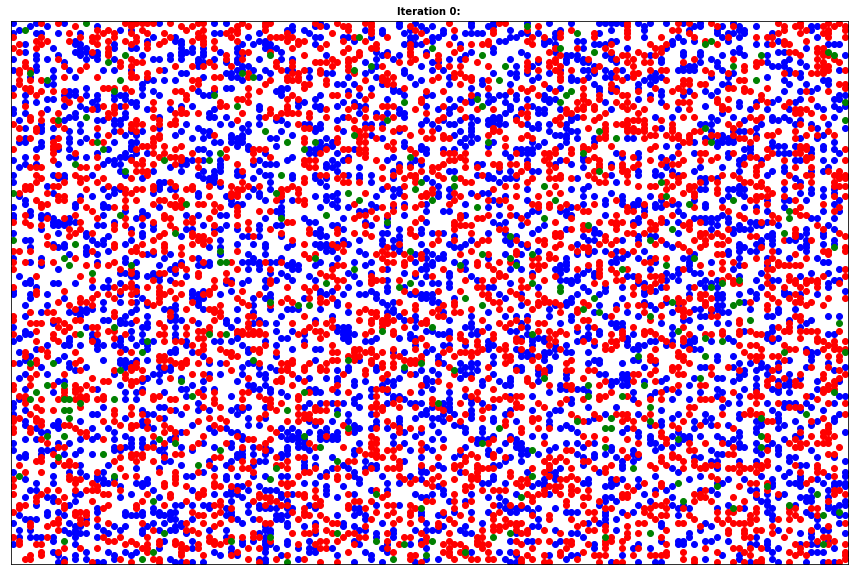

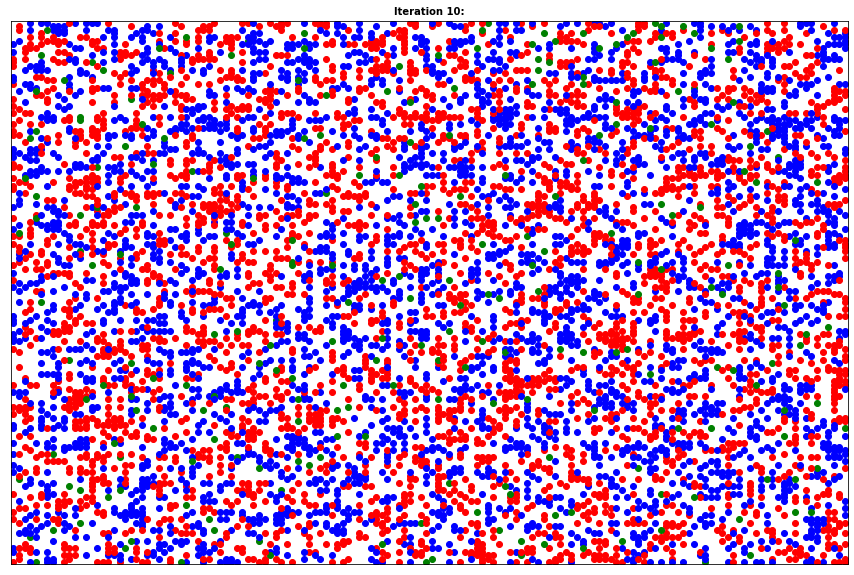

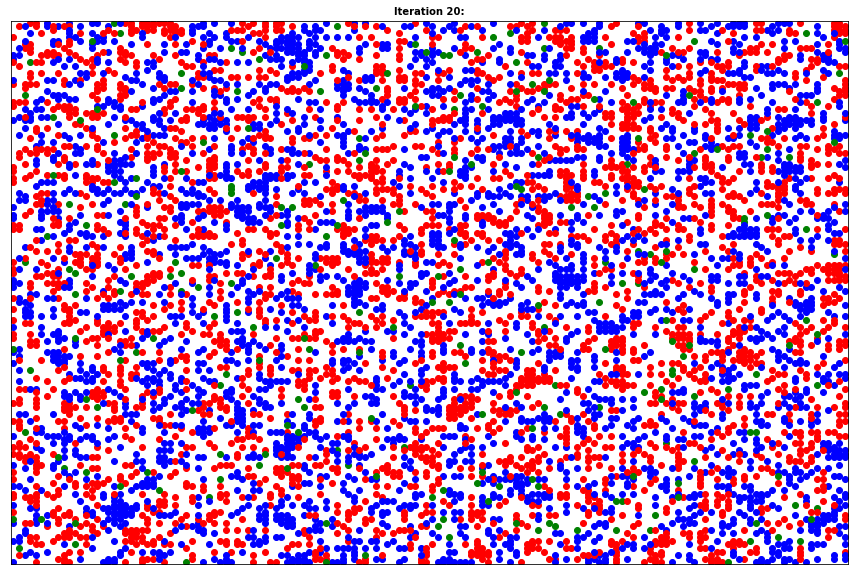

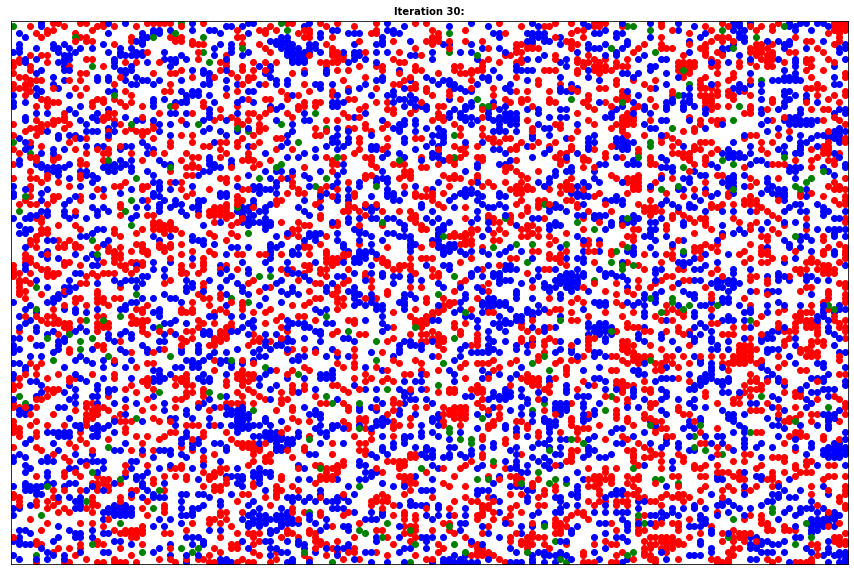

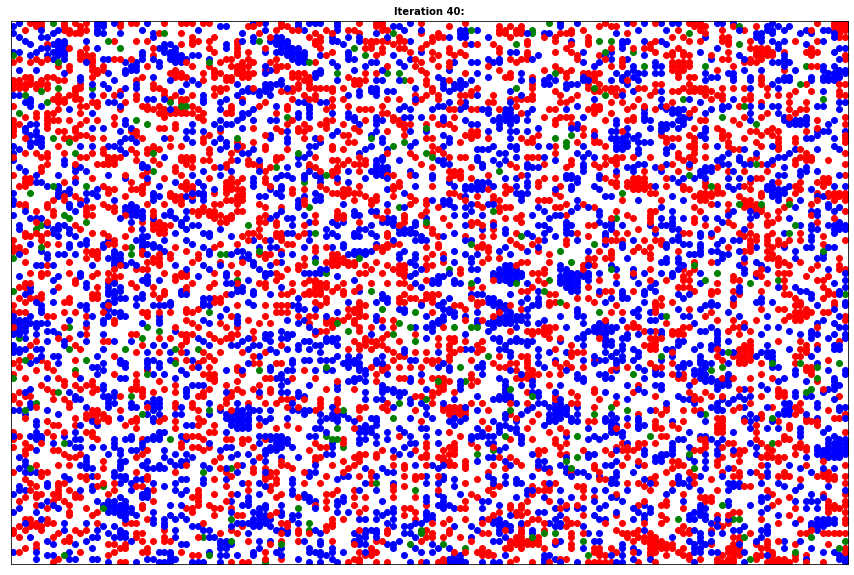

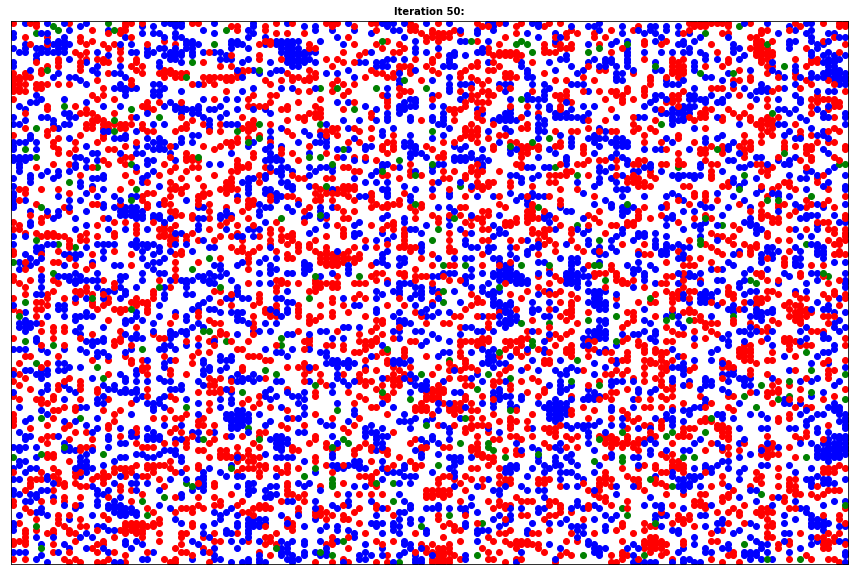

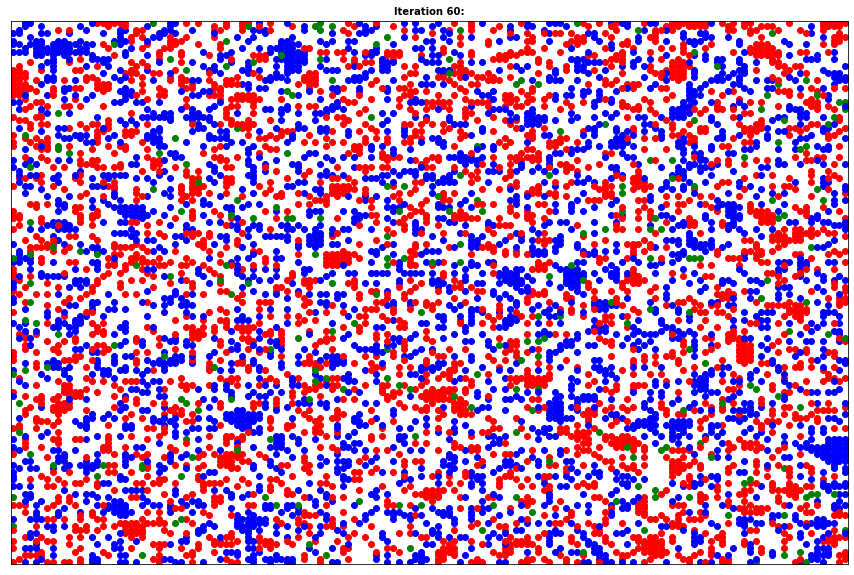

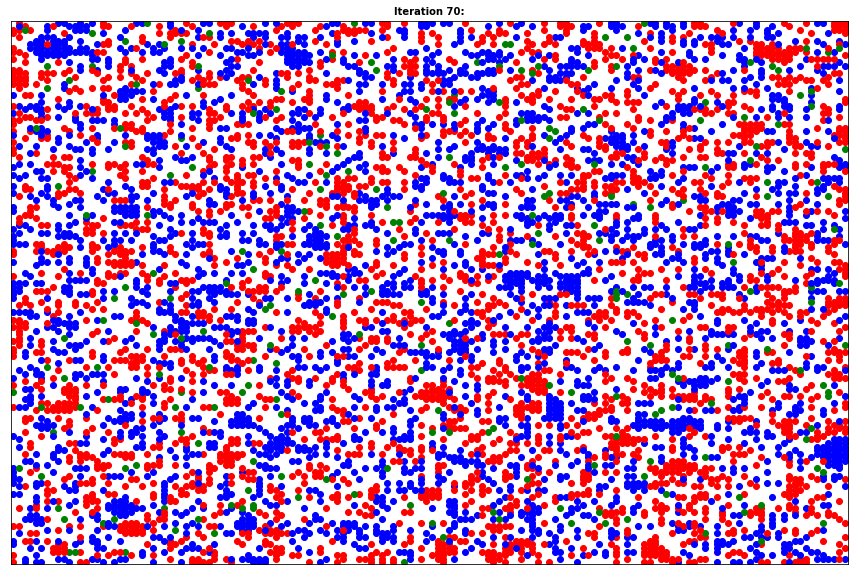

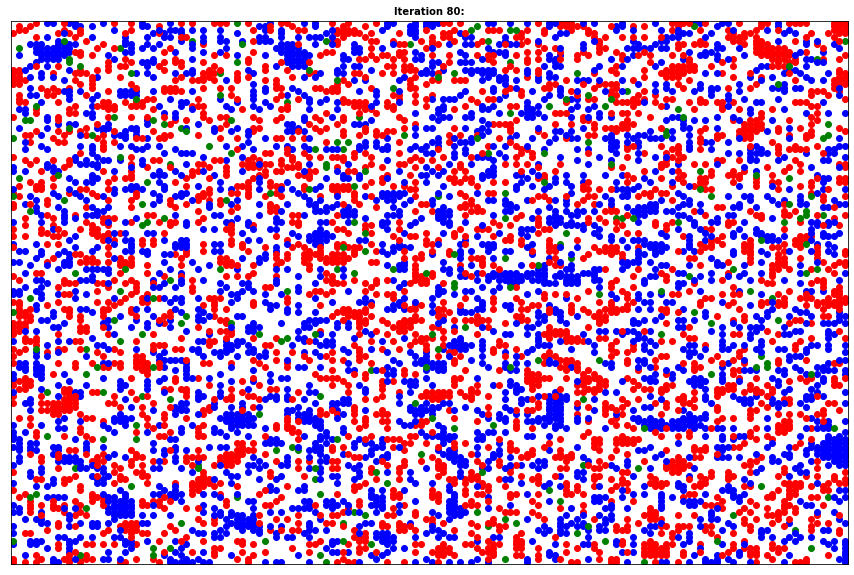

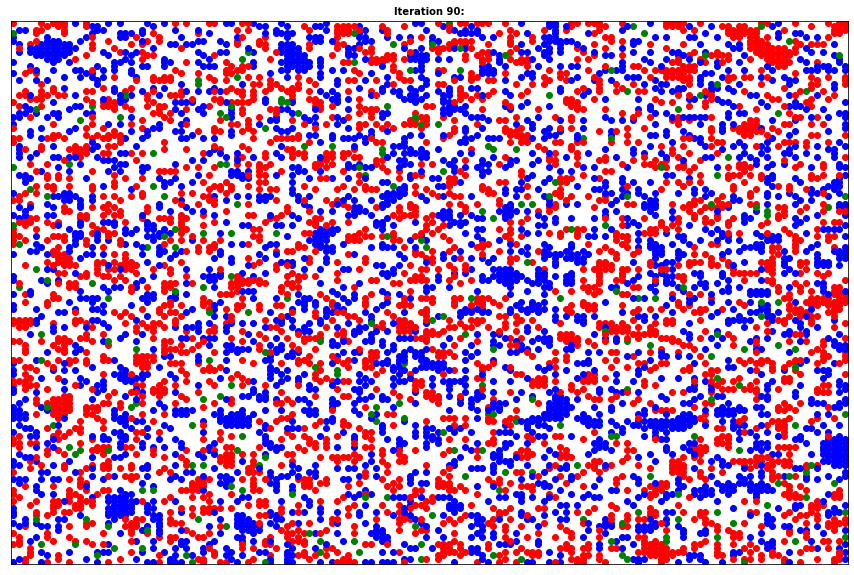

In [18]:
for i in range(n_iterations):
    old_agents = copy.deepcopy(agents)
    n_changes = 0 

    for agent in old_agents:
        if is_unsatisfied(agent[0], agent[1]):
            move_to_empty(agent)
            n_changes += 1

    print('Iteration: %d Number of changes: %d' %(i+1, n_changes))

    if i % 10 == 0:
        plot(i)
    if n_changes == 0:
        break

## 결론:
#### minority에 속하는 초록 노드(소수의 인종에 해당하는 노드)는 iteration=0인 경우와 비교하였을 때 아주 미약하게나마 초록색의 clustering이 극소수로 발견되기도 하나 사실상 clustering의 수준이 매우 낮으며, 소수의 초록 노드가 한 곳으로 모이고 밀집되기보다는 오히려 major 노드들 사이에 갇혀 있는 경우가 많다. 
#### 이것은 William과 Mark의 ‘Understanding the social context of the Schelling segregation model(2008)’ 연구에서 ‘시간이 지나면서 minorities는 같은 집단의 노드와 도 서로 멀어지는 경향이 있다’는 부분과 어느 정도 일치한다. 초록색 노드 간 clustering 개수 및 각 clustering의 크기(=cluster를 이루는 노드의 개수)는, 빨강 혹은 초록으로 이루어진 clustering의 개수와 크기에 비해 작다. 이를 통해, minority의 경우, majority에 속하는 노드에 비해 상대적으로 clustering에 대한 threshold가 더 낮음을 확인할 수 있다.
#### 이와 달리 majority에 속하는 빨강, 파랑 노드(다수의 인종에 해당하는 노드)는 시간이 지남에 따라 같은 색의 노드끼리 clustering이 뚜렷하게 이루어졌다. clustering의 크기도 큰 편이다. minority와 달리, threshold 값이 낮아지지 않았다고 볼 수 있다.